In [1]:
import socket
import spynnaker8 as p
from pyNN.random import NumpyRNG, RandomDistribution
from pyNN.utility.plotting import Figure, Panel
import matplotlib.pyplot as plt
import pdb
import numpy as np
from numpy import genfromtxt
from spinnorse_tools import fetch_files, plot_in_v_out
import os
import time

Detected PyNN version 0.9.4 and Neo version 0.6.1


In [2]:
dt = 1           # (ms) simulation timestep

cell_params = {'tau_m': 20.0,
               'tau_syn_E': 5.0,
               'tau_syn_I': 5.0,
               'v_rest': -65.0,
               'v_reset': -65.0,
               'v_thresh': -50.0,
               'tau_refrac': 0.0, # 0.1 originally
               'cm': 1,
               'i_offset': 0.0
               }

w = 1.3

2020-12-22 16:21:31 INFO: Read cfg files: /home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg, /home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg, /home/jprb/.spynnaker.cfg
2020-12-22 16:21:31 INFO: Will search these locations for binaries: /home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/common_model_binaries : /home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/model_binaries
2020-12-22 16:21:31 WARNING: /home/jprb/SpiNNorse/reports has 21 old reports that have not been closed
2020-12-22 16:21:31 WARNING: /home/jprb/SpiNNorse/application_generated_data_files has 22 old reports that have not been closed
2020-12-22 16:21:31 INFO: Setting time scale factor to 1.
2020-12-22 16:21:31 INFO: Setting machine time step to 1000 micro-seconds.
2020-12-22 16:21:31 INFO: Simulating for 200 1.0ms timesteps using a hardware timestep of 1000us
2020-12-22 16:21:31 INFO: Starting execution process
2020-12-22 

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...


2020-12-22 16:21:31 INFO: Time 0:00:00.028573 taken by InsertExtraMonitorVerticesToGraphs
Writing the board chip report
|0%                          50%                         100%|
2020-12-22 16:21:31 INFO: Time 0:00:00.007209 taken by BoardChipReport
Filtering edges
|0%                          50%                         100%|
2020-12-22 16:21:31 INFO: Time 0:00:00.034887 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|
2020-12-22 16:21:31 INFO: Time 0:00:00.043269 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-22 16:21:31 INFO: Time 0:00:00.048749 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-22 16:21:31 INFO: Time 0:00:00.012145 taken by DataInMulticastRoutingGenerator
Gene

2020-12-22 16:21:53 INFO: Time 0:00:00.006315 taken by compressedRoutingTableReports
Generating comparison of router table report
|0%                          50%                         100%|
2020-12-22 16:21:53 INFO: Time 0:00:00.006501 taken by comparisonOfRoutingTablesReport
2020-12-22 16:21:53 INFO: Running for 1 steps for a total of 200.0ms
2020-12-22 16:21:53 INFO: Run 1 of 1
Generating SDRAM usage report
|0%                          50%                         100%|
2020-12-22 16:21:53 INFO: Time 0:00:00.056893 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-22 16:21:53 INFO: Time 0:00:00.030453 taken by ChipRuntimeUpdater
2020-12-22 16:21:53 INFO: Time 0:00:00.000437 taken by DatabaseInterface
2020-12-22 16:21:53 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-22 16:21:53 INFO: Time 0:00:00.000905 taken by NotificationProtocol
2020-12-22 16:21:53 INFO: *** Running si

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...


2020-12-22 16:22:04 INFO: Time 0:00:00.012634 taken by BoardChipReport
Filtering edges
|0%                          50%                         100%|
2020-12-22 16:22:04 INFO: Time 0:00:00.029257 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|
2020-12-22 16:22:04 INFO: Time 0:00:00.041041 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-22 16:22:04 INFO: Time 0:00:00.042680 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-22 16:22:04 INFO: Time 0:00:00.008471 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-22 16:22:04 INFO: Time 0:00:00.005447 taken by FixedRouteRouter
Generating placement 

2020-12-22 16:22:26 INFO: Time 0:00:00.008694 taken by comparisonOfRoutingTablesReport
2020-12-22 16:22:26 INFO: Running for 1 steps for a total of 200.0ms
2020-12-22 16:22:26 INFO: Run 1 of 1
Generating SDRAM usage report
|0%                          50%                         100%|
2020-12-22 16:22:26 INFO: Time 0:00:00.071491 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-22 16:22:26 INFO: Time 0:00:00.031464 taken by ChipRuntimeUpdater
2020-12-22 16:22:26 INFO: Time 0:00:00.000244 taken by DatabaseInterface
2020-12-22 16:22:26 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-22 16:22:26 INFO: Time 0:00:00.001083 taken by NotificationProtocol
2020-12-22 16:22:26 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-22 16:22:26 INFO: ** Awaiting for a response from an external source to state its ready f

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...


2020-12-22 16:22:37 INFO: Time 0:00:00.028642 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|
2020-12-22 16:22:37 INFO: Time 0:00:00.036961 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-22 16:22:37 INFO: Time 0:00:00.041253 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-22 16:22:37 INFO: Time 0:00:00.006000 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-22 16:22:37 INFO: Time 0:00:00.003694 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%            

2020-12-22 16:22:59 INFO: Run 1 of 1
Generating SDRAM usage report
|0%                          50%                         100%|
2020-12-22 16:22:59 INFO: Time 0:00:00.073667 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-22 16:22:59 INFO: Time 0:00:00.030575 taken by ChipRuntimeUpdater
2020-12-22 16:22:59 INFO: Time 0:00:00.000225 taken by DatabaseInterface
2020-12-22 16:22:59 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-22 16:22:59 INFO: Time 0:00:00.001404 taken by NotificationProtocol
2020-12-22 16:22:59 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-22 16:22:59 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-22 16:22:59 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...


2020-12-22 16:23:10 INFO: Time 0:00:00.117265 taken by BoardChipReport
Filtering edges
|0%                          50%                         100%|
2020-12-22 16:23:10 INFO: Time 0:00:00.031079 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|
2020-12-22 16:23:11 INFO: Time 0:00:00.042049 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-22 16:23:11 INFO: Time 0:00:00.038820 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-22 16:23:11 INFO: Time 0:00:00.008297 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-22 16:23:11 INFO: Time 0:00:00.005013 taken by FixedRouteRouter
Generating placement 

2020-12-22 16:23:32 INFO: Time 0:00:00.007847 taken by comparisonOfRoutingTablesReport
2020-12-22 16:23:32 INFO: Running for 1 steps for a total of 200.0ms
2020-12-22 16:23:32 INFO: Run 1 of 1
Generating SDRAM usage report
|0%                          50%                         100%|
2020-12-22 16:23:32 INFO: Time 0:00:00.073796 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-22 16:23:32 INFO: Time 0:00:00.028232 taken by ChipRuntimeUpdater
2020-12-22 16:23:32 INFO: Time 0:00:00.000152 taken by DatabaseInterface
2020-12-22 16:23:32 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-22 16:23:32 INFO: Time 0:00:00.001441 taken by NotificationProtocol
2020-12-22 16:23:32 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-22 16:23:32 INFO: ** Awaiting for a response from an external source to state its ready f

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...


2020-12-22 16:23:44 INFO: Time 0:00:00.028482 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|
2020-12-22 16:23:44 INFO: Time 0:00:00.038325 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-22 16:23:44 INFO: Time 0:00:00.046667 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-22 16:23:44 INFO: Time 0:00:00.006361 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-22 16:23:44 INFO: Time 0:00:00.007238 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%            

2020-12-22 16:24:06 INFO: Running for 1 steps for a total of 200.0ms
2020-12-22 16:24:06 INFO: Run 1 of 1
Generating SDRAM usage report
|0%                          50%                         100%|
2020-12-22 16:24:06 INFO: Time 0:00:00.049363 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-22 16:24:06 INFO: Time 0:00:00.028649 taken by ChipRuntimeUpdater
2020-12-22 16:24:06 INFO: Time 0:00:00.000311 taken by DatabaseInterface
2020-12-22 16:24:06 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-22 16:24:06 INFO: Time 0:00:00.001299 taken by NotificationProtocol
2020-12-22 16:24:06 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-22 16:24:07 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-22 16:24:07 INFO: ** Sending start / resume messa

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...



2020-12-22 16:24:18 INFO: Time 0:00:00.022303 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|
2020-12-22 16:24:18 INFO: Time 0:00:00.034843 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-22 16:24:18 INFO: Time 0:00:00.045620 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-22 16:24:18 INFO: Time 0:00:00.007085 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-22 16:24:18 INFO: Time 0:00:00.004135 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%           

2020-12-22 16:24:39 INFO: Run 1 of 1
Generating SDRAM usage report
|0%                          50%                         100%|
2020-12-22 16:24:39 INFO: Time 0:00:00.054272 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-22 16:24:39 INFO: Time 0:00:00.031826 taken by ChipRuntimeUpdater
2020-12-22 16:24:39 INFO: Time 0:00:00.000161 taken by DatabaseInterface
2020-12-22 16:24:39 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-22 16:24:39 INFO: Time 0:00:00.000698 taken by NotificationProtocol
2020-12-22 16:24:39 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-22 16:24:39 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-22 16:24:39 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...


2020-12-22 16:24:50 INFO: Time 0:00:00.031046 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|
2020-12-22 16:24:51 INFO: Time 0:00:00.036279 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-22 16:24:51 INFO: Time 0:00:00.047931 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-22 16:24:51 INFO: Time 0:00:00.005619 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-22 16:24:51 INFO: Time 0:00:00.006854 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%            

2020-12-22 16:25:15 INFO: Run 1 of 1
Generating SDRAM usage report
|0%                          50%                         100%|
2020-12-22 16:25:15 INFO: Time 0:00:00.053273 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-22 16:25:15 INFO: Time 0:00:00.031560 taken by ChipRuntimeUpdater
2020-12-22 16:25:15 INFO: Time 0:00:00.000168 taken by DatabaseInterface
2020-12-22 16:25:15 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-22 16:25:15 INFO: Time 0:00:00.000779 taken by NotificationProtocol
2020-12-22 16:25:15 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-22 16:25:15 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-22 16:25:15 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...


2020-12-22 16:25:27 INFO: Time 0:00:00.029168 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|
2020-12-22 16:25:27 INFO: Time 0:00:00.031072 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-22 16:25:27 INFO: Time 0:00:00.046566 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-22 16:25:27 INFO: Time 0:00:00.006103 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-22 16:25:27 INFO: Time 0:00:00.006394 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%            

2020-12-22 16:25:51 INFO: Run 1 of 1
Generating SDRAM usage report
|0%                          50%                         100%|
2020-12-22 16:25:51 INFO: Time 0:00:00.051873 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-22 16:25:51 INFO: Time 0:00:00.032106 taken by ChipRuntimeUpdater
2020-12-22 16:25:51 INFO: Time 0:00:00.000170 taken by DatabaseInterface
2020-12-22 16:25:51 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-22 16:25:51 INFO: Time 0:00:00.000584 taken by NotificationProtocol
2020-12-22 16:25:51 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-22 16:25:52 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-22 16:25:52 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...


2020-12-22 16:26:03 INFO: Time 0:00:00.031293 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|
2020-12-22 16:26:03 INFO: Time 0:00:00.034517 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-22 16:26:03 INFO: Time 0:00:00.042538 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-22 16:26:03 INFO: Time 0:00:00.008924 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-22 16:26:03 INFO: Time 0:00:00.006780 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%            

2020-12-22 16:26:24 INFO: Run 1 of 1
Generating SDRAM usage report
|0%                          50%                         100%|
2020-12-22 16:26:24 INFO: Time 0:00:00.056493 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-22 16:26:24 INFO: Time 0:00:00.030948 taken by ChipRuntimeUpdater
2020-12-22 16:26:24 INFO: Time 0:00:00.000214 taken by DatabaseInterface
2020-12-22 16:26:24 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-22 16:26:24 INFO: Time 0:00:00.000602 taken by NotificationProtocol
2020-12-22 16:26:24 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-22 16:26:24 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-22 16:26:24 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...


2020-12-22 16:26:35 INFO: Time 0:00:00.023788 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|
2020-12-22 16:26:36 INFO: Time 0:00:00.030049 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-22 16:26:36 INFO: Time 0:00:00.046689 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-22 16:26:36 INFO: Time 0:00:00.005677 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-22 16:26:36 INFO: Time 0:00:00.008220 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%            

2020-12-22 16:26:59 INFO: Run 1 of 1
Generating SDRAM usage report
|0%                          50%                         100%|
2020-12-22 16:26:59 INFO: Time 0:00:00.063136 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-22 16:26:59 INFO: Time 0:00:00.025154 taken by ChipRuntimeUpdater
2020-12-22 16:26:59 INFO: Time 0:00:00.000233 taken by DatabaseInterface
2020-12-22 16:26:59 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-22 16:26:59 INFO: Time 0:00:00.000832 taken by NotificationProtocol
2020-12-22 16:26:59 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-22 16:26:59 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-22 16:26:59 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...



2020-12-22 16:27:10 INFO: Time 0:00:00.026658 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|
2020-12-22 16:27:11 INFO: Time 0:00:00.033505 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-22 16:27:11 INFO: Time 0:00:00.055500 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-22 16:27:11 INFO: Time 0:00:00.004235 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-22 16:27:11 INFO: Time 0:00:00.002885 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%           

2020-12-22 16:27:32 INFO: Run 1 of 1
Generating SDRAM usage report
|0%                          50%                         100%|
2020-12-22 16:27:32 INFO: Time 0:00:00.046063 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-22 16:27:32 INFO: Time 0:00:00.029780 taken by ChipRuntimeUpdater
2020-12-22 16:27:32 INFO: Time 0:00:00.000193 taken by DatabaseInterface
2020-12-22 16:27:32 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-22 16:27:32 INFO: Time 0:00:00.000980 taken by NotificationProtocol
2020-12-22 16:27:32 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-22 16:27:32 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-22 16:27:32 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...


2020-12-22 16:27:44 INFO: Time 0:00:00.031984 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-22 16:27:44 INFO: Time 0:00:00.043593 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-22 16:27:44 INFO: Time 0:00:00.006348 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-22 16:27:44 INFO: Time 0:00:00.006176 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%                         100%|
2020-12-22 16:27:44 INFO: Time 0:00:00.049572 taken by PlacerReportWithApplicationGraph
Routing
|0%                          50%          

2020-12-22 16:28:05 INFO: Time 0:00:00.051756 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-22 16:28:05 INFO: Time 0:00:00.029020 taken by ChipRuntimeUpdater
2020-12-22 16:28:05 INFO: Time 0:00:00.000191 taken by DatabaseInterface
2020-12-22 16:28:05 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-22 16:28:05 INFO: Time 0:00:00.000931 taken by NotificationProtocol
2020-12-22 16:28:05 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-22 16:28:05 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-22 16:28:05 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed. **
2020-12-22 16:28:05 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start *

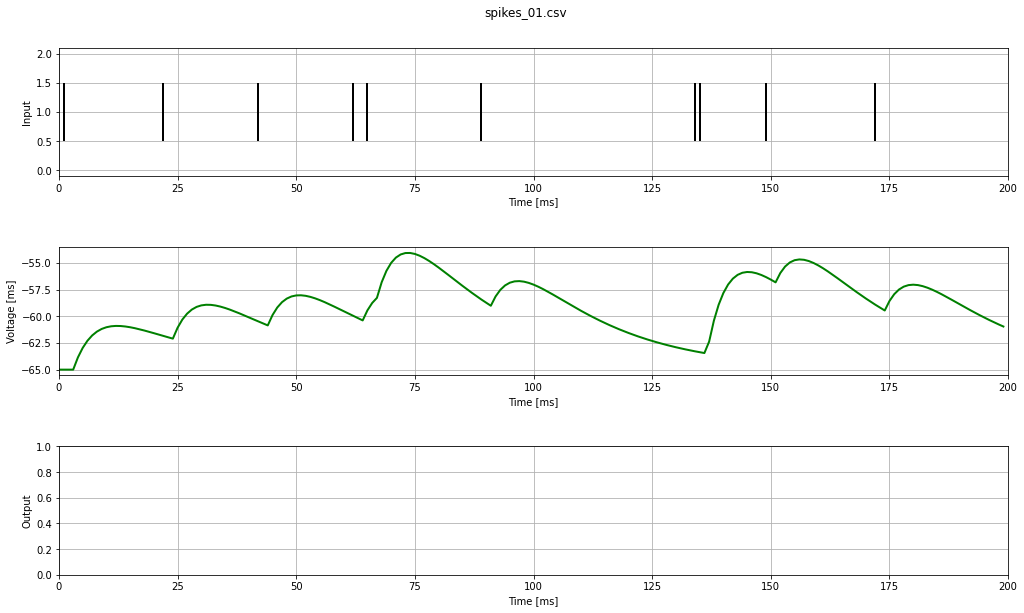

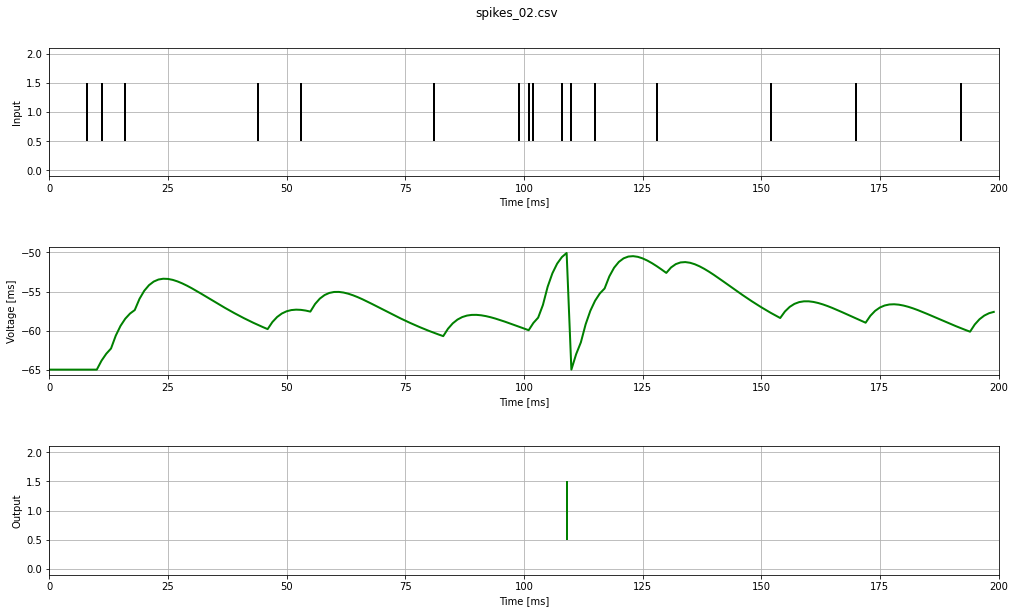

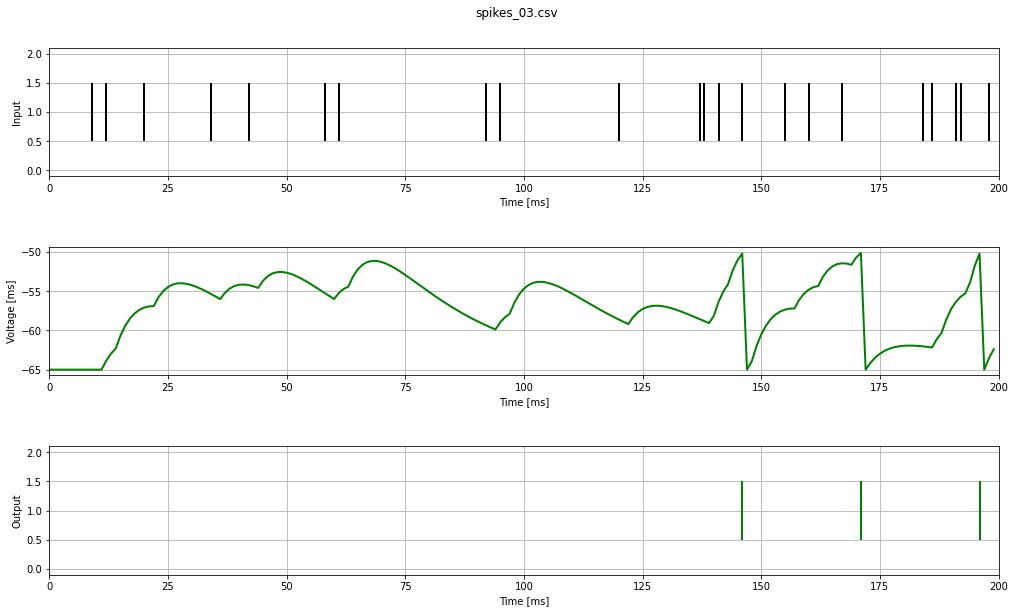

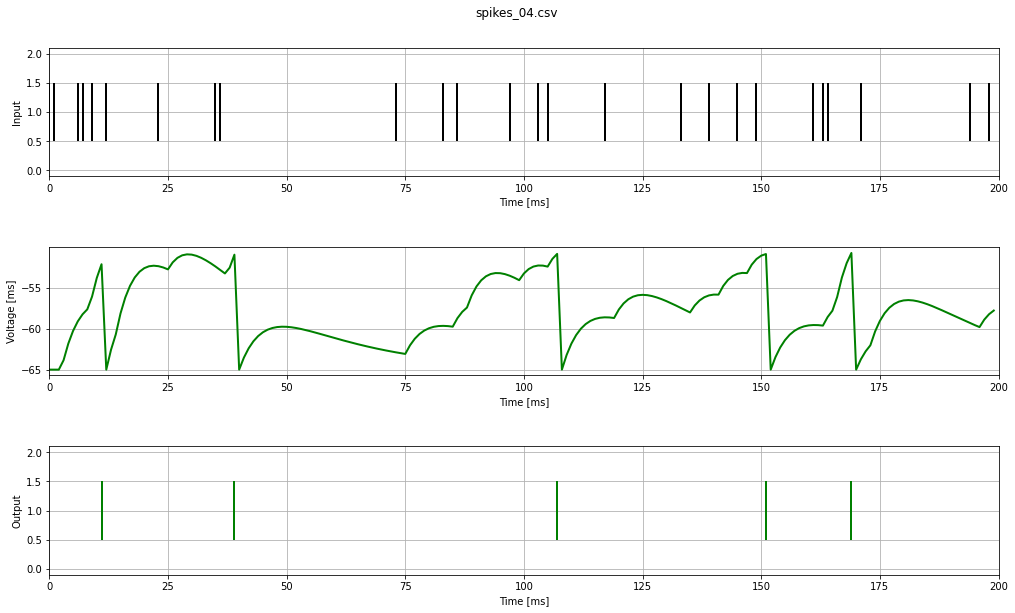

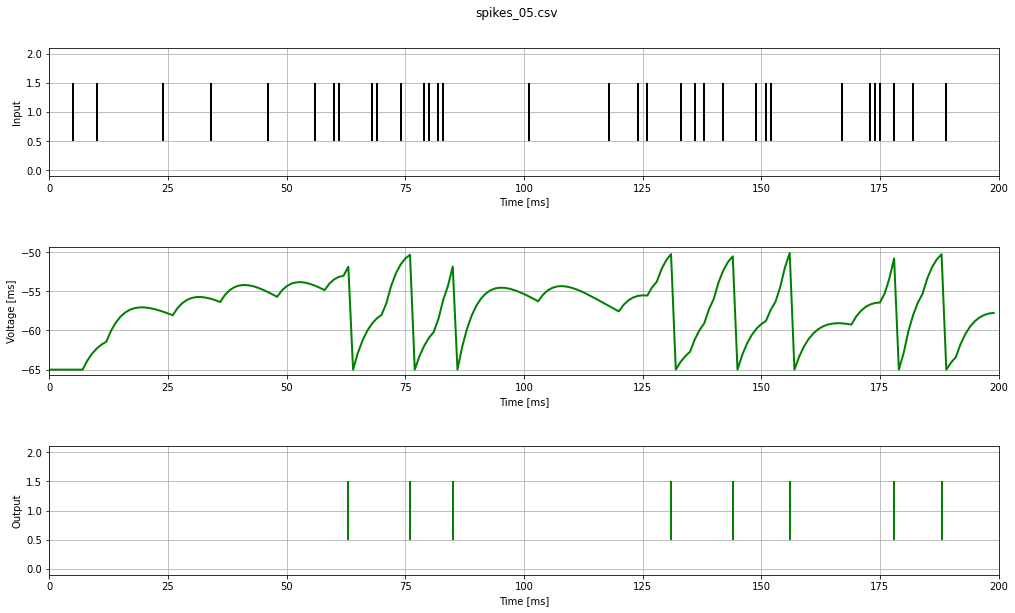

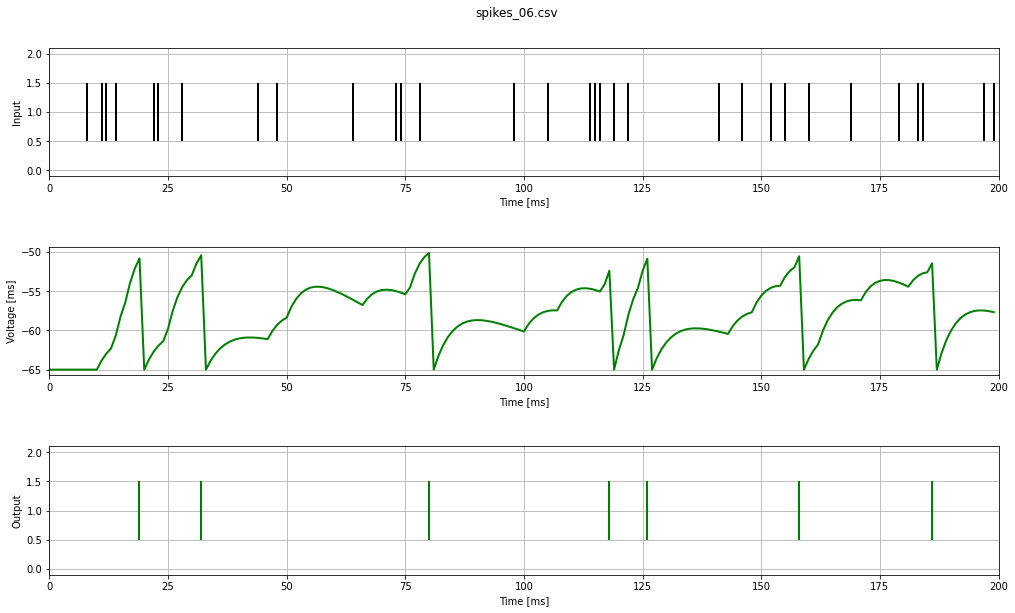

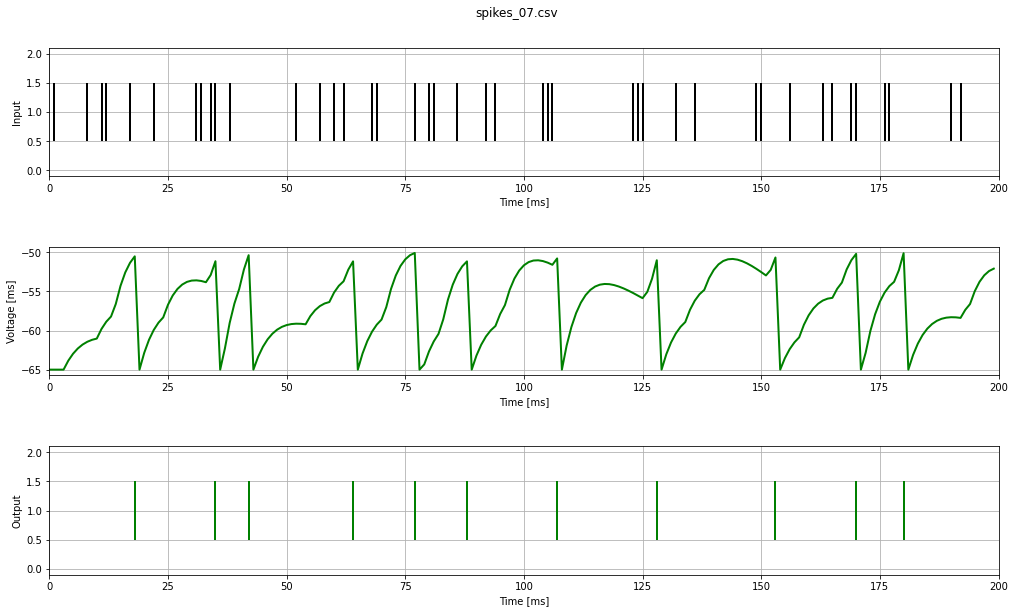

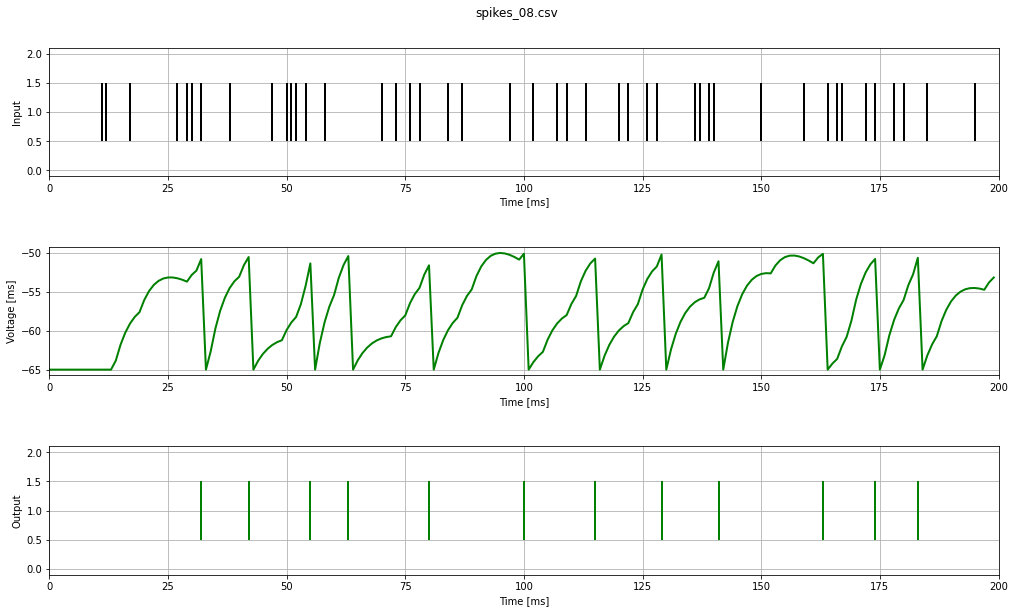

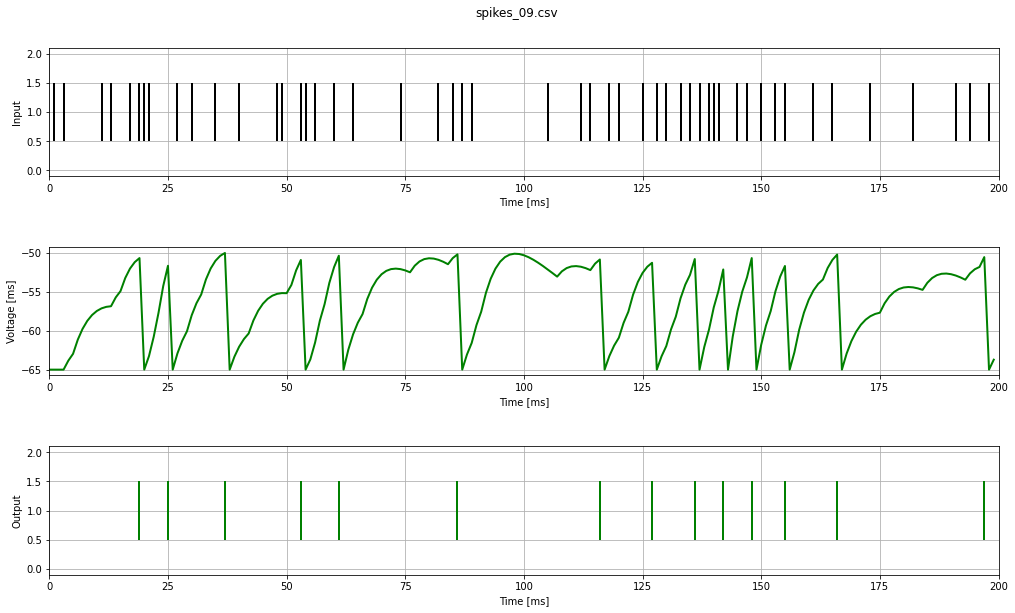

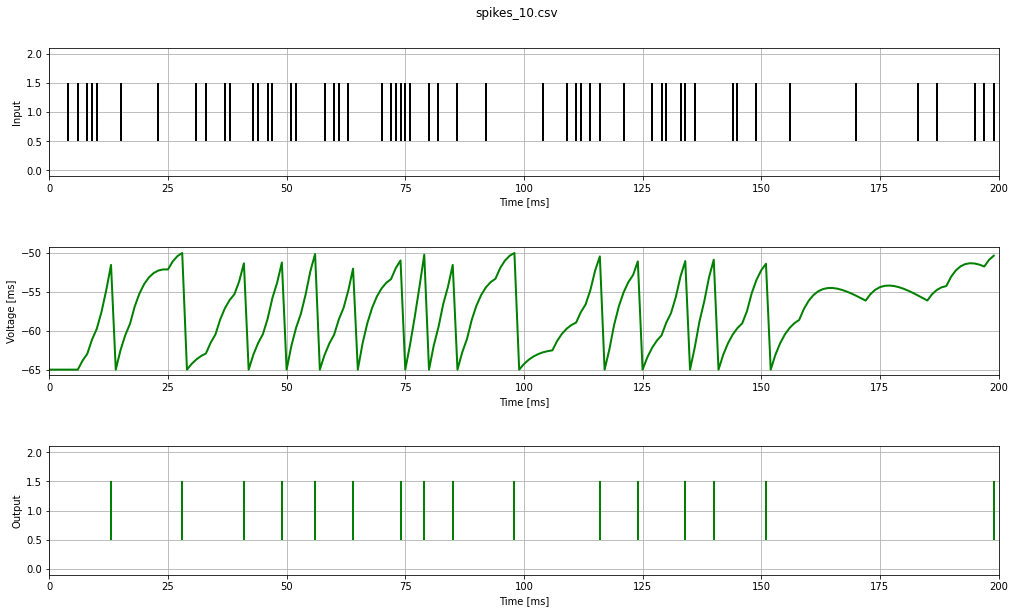

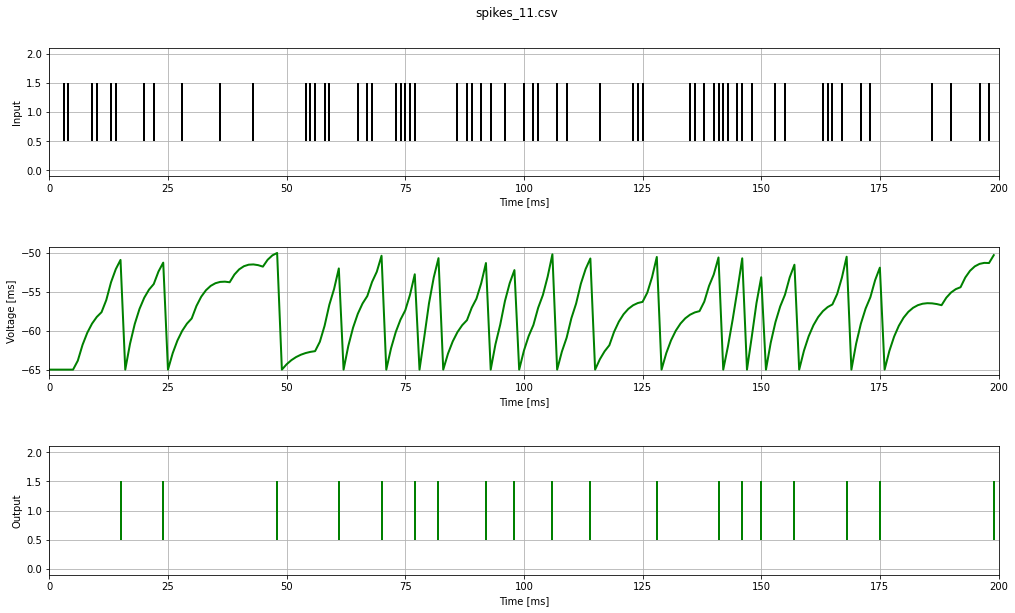

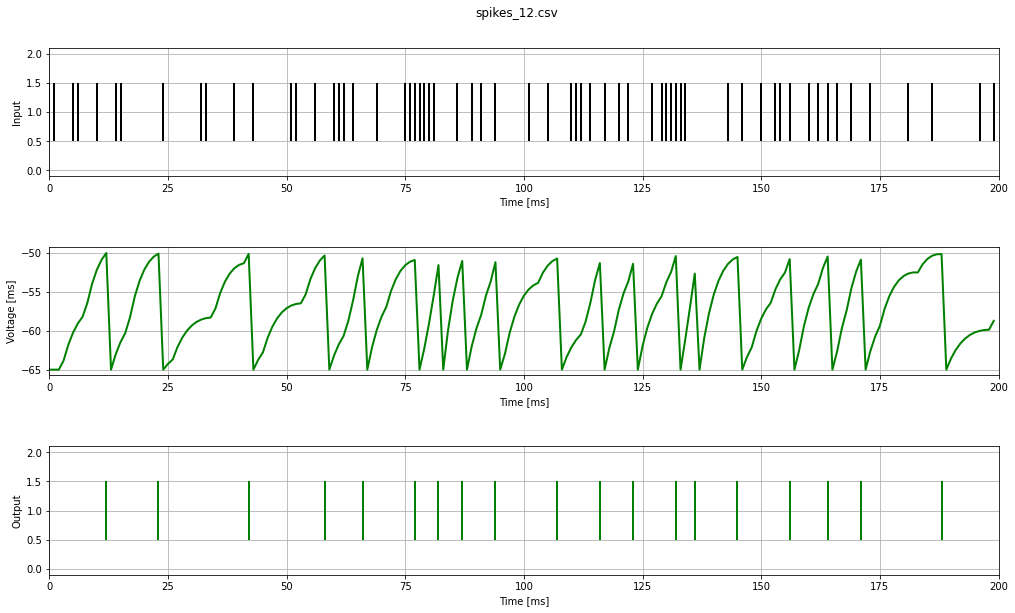

In [3]:
'''
Fetch available trains of spikes in path
'''
path = "summary/common/"
files = fetch_files(path) 


'''
Simulate for each input file + Plot + Save data
'''
n = len(files)
for i in range(n):
        
    #SpiNNaker Setup
    delay = 2*dt
    node_id = p.setup(timestep=dt, min_delay=delay, max_delay=delay)     
    p.set_number_of_neurons_per_core(p.IF_curr_exp, 100) #  100 neurons per core
    
    # Get Input Spikes from file
    f_name = files[i]
    sfn = f_name.replace(path, "")
    i_spikes = genfromtxt(files[i], delimiter=',')
    i_indexes = np.where(i_spikes>0)

    i_spikes = genfromtxt(files[i], delimiter=',')
    i_indexes = np.where(i_spikes>0)
    nb_steps = len(i_spikes)

    # Populations
    print("Creating cell populations in node %s ..." % node_id)
    celltype = p.IF_curr_exp
    cells_l1 = p.Population(1, celltype(**cell_params), label="Layer_1")

    spike_train_1 = p.SpikeSourceArray(spike_times=(i_indexes))
    cells_l0 = p.Population(1,spike_train_1)

    # Connectivity
    print("Connecting populations  in node %s ..." % node_id)
    cell_conn = p.AllToAllConnector()
    connections = { 'i1l1': p.Projection(cells_l0, cells_l1, cell_conn,
                            receptor_type='excitatory',
                            synapse_type=p.StaticSynapse(weight=w, delay=delay))}

    # === Setup recording ===
    print("Setting up recording in node %s ..." % node_id)
    cells_l1.record(["v","spikes"])
    cells_l0.record(["spikes"])

    # === Run simulation ===
    print("%d Running simulation..." % node_id)
    p.run(nb_steps)

    # === Print results to file ===

    l1_voltage = cells_l1.get_data("v")
    l1_spikes = cells_l1.get_data("spikes")
    in_spikes = cells_l0.get_data("spikes")

    # === Finished with simulator ===

    p.end()
    time.sleep(10)
    v_array = np.array(l1_voltage.segments[0].filter(name="v")[0]).reshape(-1)

    i_indexes = np.asarray(in_spikes.segments[0].spiketrains[0])
    o_indexes = np.asarray(l1_spikes.segments[0].spiketrains[0])

    o_spikes = np.zeros(nb_steps)
    for i in o_indexes.astype(int):
        o_spikes[i] = 1

    np.savetxt("summary/spinnaker/" + "voltage_" + sfn, v_array, delimiter=",")
    np.savetxt("summary/spinnaker/" + "output_" + sfn, o_spikes, delimiter=",")

    xlim = len(i_spikes)
    plot_in_v_out(i_indexes, v_array, o_indexes, sfn, xlim)